# New Notebook

In [1]:
#import necessary modules
import yahoo_finance as yfin
import pandas as pd
import pandas_datareader.data as web
import datetime
import csv
import math
import pandas_datareader.data as data
from yahoo_finance import Share
from pandas_datareader.yahoo.quotes import _yahoo_codes
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
import time
%matplotlib inline
import random
import pickle
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats

In [2]:
#get a dataframe of financials for the S&P 500. Put it in a local csv and read it that way from now on

#not necessary anymore
#new_data=pd.read_csv('https://raw.githubusercontent.com/datasets/s-and-p-500-companies/master/data/constituents-financials.csv')
#new_data.to_csv('s&p500.csv')

#s&p data
new_data=pd.read_csv('s&p500.csv')
#adjusted close price data--can we drop this one out of the whole study since we're limiting to s&p now?
stockHistory=pd.read_csv('WilshireHist.csv')

In [3]:
sectordf=new_data.set_index('Symbol')

In [4]:
# sectordf

In [5]:
# sectordf.loc['MMM']['Sector']

In [6]:
# fruitless
# for i in range(len(new_data['Symbol'])):
#    print stockHistory[new_data['Symbol'][i]]

In [7]:
#make a list of all the market caps

# THE FOLLOWING IS NO LONGER NECESSARY SINCE WE HAVE THESE SAVED IN PICKLE
# mylist=[]
# for x in range(len(new_data)):
#     mylist.append(Share(new_data['Symbol'][x]).get_market_cap()) #mylist.append(new_data['Symbol'][x])#

In [8]:
#Unpickling the list of all market caps (to avoid having to use the internet whenever carrying out statistical analysis)

#Put the following into a file

#with open("test.txt", "wb") as fp:   #Pickling
#    pickle.dump(mylist, fp)

with open("test.txt", "rb") as fp:   # Unpickling
    mylist = pickle.load(fp)

In [9]:
len(mylist)

505

In [10]:
mylist

['114.00B',
 '79.00B',
 '105.01B',
 '77.16B',
 '36.99B',
 '9.27B',
 '59.83B',
 '11.32B',
 '7.35B',
 '46.71B',
 '9.29B',
 '28.91B',
 '16.81B',
 '30.19B',
 '11.12B',
 '11.93B',
 '11.60B',
 '28.60B',
 '7.11B',
 '80.84B',
 '13.88B',
 '8.79B',
 '29.96B',
 '595.59B',
 '583.04B',
 '148.31B',
 '406.77B',
 '13.08B',
 '22.13B',
 '32.16B',
 '71.54B',
 '61.79B',
 '48.52B',
 '13.53B',
 '20.35B',
 '19.19B',
 '12.30B',
 '133.62B',
 '21.71B',
 '34.60B',
 '25.42B',
 '44.00B',
 '30.95B',
 '19.07B',
 '6.82B',
 '730.00B',
 '41.16B',
 '25.72B',
 '11.82B',
 '10.12B',
 '5.54B',
 '260.10B',
 '19.04B',
 '46.93B',
 '4.52B',
 '20.42B',
 '24.41B',
 '7.09B',
 '23.94B',
 '12.91B',
 '266.17B',
 '17.99B',
 '28.09B',
 '38.57B',
 '39.44B',
 '5.84B',
 None,
 '14.04B',
 '63.11B',
 '62.73B',
 '4.92B',
 '109.45B',
 '8.89B',
 '20.06B',
 '33.60B',
 '97.55B',
 '90.31B',
 None,
 '11.21B',
 '13.54B',
 '10.56B',
 '18.11B',
 '44.27B',
 '25.88B',
 '12.01B',
 '41.53B',
 '54.14B',
 '6.47B',
 '12.10B',
 '27.61B',
 '96.47B',
 '11.77B'

In [11]:
#stockHistory.columns

In [12]:
# ls_key = 'Adj Close'
# start = datetime.datetime(2004,1,1)
# end = datetime.datetime(2016,12,31)
# f = data.DataReader(new_data['Symbol'], 'yahoo',start,end)

# cleanData = f.ix[ls_key]
# dataFrame = pd.DataFrame(cleanData)

# print dataFrame[:]

In [13]:
#dataFrame.to_csv('s&phist.csv')
dataFrame=pd.read_csv('s&phist.csv')

In [14]:
#change the index to date. Now the two dataframes each contain info on 505 companies
dataFrame.set_index('Date')

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-02,18.442521,NaN,25.954398,1.378514,NaN,11.482295,13.767639,20.798770,19.518398,33.114265,...,29.240683,29.218492,20.833227,7.305467,NaN,22.700001,9.529809,66.822603,50.820666,NaN
2004-01-05,18.922795,NaN,25.718507,1.436168,NaN,11.871418,13.767639,21.392562,19.867833,34.133944,...,30.182217,29.901671,20.488106,7.429106,NaN,23.450001,9.669076,66.221203,50.710919,NaN
2004-01-06,19.518334,NaN,26.177538,1.430985,NaN,11.822511,13.667511,21.143812,19.887801,34.900510,...,29.992392,29.700311,20.520753,7.563497,NaN,23.620001,9.958977,65.896632,51.411604,NaN
2004-01-07,19.768077,NaN,26.999970,1.463375,NaN,11.937334,13.811813,20.662358,19.694549,35.247637,...,29.696265,29.484571,20.413485,7.590375,NaN,23.834999,9.788447,66.631685,51.057040,NaN
2004-01-08,20.670992,NaN,26.285920,1.513256,NaN,11.879923,13.405410,19.972275,18.975479,35.876800,...,30.964297,29.412659,20.544071,7.611877,NaN,24.290001,9.816868,67.920405,51.327183,NaN
2004-01-09,20.523708,NaN,26.254043,1.489935,NaN,11.826764,13.231658,20.237074,18.536047,35.305490,...,30.713729,28.973985,20.506762,7.504365,NaN,24.059999,9.706023,67.634019,50.677151,NaN
2004-01-12,20.747837,NaN,26.566441,1.537224,NaN,11.748089,13.087356,20.790746,18.655893,36.368561,...,32.247517,29.383893,20.273572,7.541994,NaN,24.870001,9.805500,67.634019,50.212843,NaN
2004-01-13,20.645377,NaN,26.713074,1.562488,NaN,11.514191,13.156946,18.182875,18.571001,36.223925,...,30.379634,29.254448,20.077691,7.391477,NaN,24.400000,9.708866,66.784418,49.664117,NaN
2004-01-14,20.581342,NaN,26.840585,1.567671,NaN,11.748089,13.177675,19.009370,18.551029,36.665063,...,31.070598,29.254448,19.961096,7.391477,NaN,24.195000,9.833922,66.832151,49.799188,NaN


In [15]:
datesSaved=dataFrame['Date'] #make a temporary storage space

In [16]:
del dataFrame['Date'] #get rid of the extra column, which stuck around after we set it as the index

In [17]:
dataFrame=dataFrame.set_index(datesSaved)

In [18]:
dataFrame.columns

Index([u'A', u'AAL', u'AAP', u'AAPL', u'ABBV', u'ABC', u'ABT', u'ACN', u'ADBE',
       u'ADI',
       ...
       u'XLNX', u'XOM', u'XRAY', u'XRX', u'XYL', u'YHOO', u'YUM', u'ZBH',
       u'ZION', u'ZTS'],
      dtype='object', length=505)

In [19]:
updown=dataFrame.shift(periods=1)
# updown

In [20]:
#######CHECK TO MAKE SURE YOU DID SUBTRACTION FROM LAST MONTH'S AVERAGES######

In [21]:
posneg=pd.DataFrame(dataFrame>updown)
# posneg

In [22]:
# I think I didn't ultimately use these
# a=posneg.columns
# b=list(a)
# c=random.sample(b, 50)

In [23]:
#read in the trends for the first hundred or so s&p500 companies--*scale up from here**
trends=pd.read_csv('sp2.csv')

In [24]:
# I think this cell is unnecessary
#dataFrame['dates']=dataFrame.index

In [25]:
dataFrame.index=dataFrame.index.to_datetime() #change the index types to datetime so that we can get monthly averages

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  if __name__ == '__main__':


In [26]:
# tests and stuff!
# type(dataFrame['dates'][1])
# dataFrame.index[1]

In [27]:
#the easy way
avgMonthly=dataFrame.resample("M").mean()

In [28]:
# avgMonthly

In [29]:
#More steps, but also makes sense. I commented it out since the above already accomplished it

z1=pd.groupby(dataFrame,by=[dataFrame.index.month,dataFrame.index.year])
z2=dataFrame.groupby(pd.TimeGrouper(freq='M'))
z1
z3=z2.mean()

In [30]:
# I think this part failed. I still don't understand 'lambda'
#dataFrame['normed'] = dataFrame.groupby(grouper).transform(lambda x: x/x.mean())

In [31]:
trendsdated=trends.set_index('Month')
trendsdatedsig=trendsdated==100
# trendsdatedsig

In [32]:
#Running high program below to replace the one above

In [33]:
trendscummax=trendsdated.cummax()

In [34]:
trendscummax

,AMP,ABC,AME,AMGN,APH,APC,ADI,ANTM,AON,APA,...,WYNN,XEL,XRX,XLNX,XYL,YHOO,YUM,ZBH,ZION,ZTS
Month,,,,,,,,,,,,,,,,,,,,,
2004-01,22,64,96,43,73,47,97,64,79,51,...,24,80,93,90,76,49,77,76,47,0
2004-02,23,100,96,46,98,64,99,66,79,51,...,24,82,100,100,100,50,82,76,47,0
2004-03,23,100,96,49,98,64,100,66,79,51,...,25,84,100,100,100,50,82,78,54,0
2004-04,23,100,96,49,98,64,100,66,79,51,...,34,84,100,100,100,53,100,100,54,0
2004-05,23,100,96,49,98,64,100,66,79,51,...,34,84,100,100,100,53,100,100,54,0
2004-06,23,100,96,49,98,64,100,70,79,51,...,34,84,100,100,100,56,100,100,54,0
2004-07,23,100,100,49,100,64,100,70,79,51,...,34,84,100,100,100,57,100,100,54,0
2004-08,23,100,100,49,100,66,100,70,79,51,...,34,86,100,100,100,58,100,100,54,0
2004-09,23,100,100,49,100,66,100,70,81,51,...,34,86,100,100,100,58,100,100,54,0


In [35]:
trendscummaxshifted=trendscummax.shift(periods=1)

In [36]:
trendscummaxshifted

,AMP,ABC,AME,AMGN,APH,APC,ADI,ANTM,AON,APA,...,WYNN,XEL,XRX,XLNX,XYL,YHOO,YUM,ZBH,ZION,ZTS
Month,,,,,,,,,,,,,,,,,,,,,
2004-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02,22.0,64.0,96.0,43.0,73.0,47.0,97.0,64.0,79.0,51.0,...,24.0,80.0,93.0,90.0,76.0,49.0,77.0,76.0,47.0,0.0
2004-03,23.0,100.0,96.0,46.0,98.0,64.0,99.0,66.0,79.0,51.0,...,24.0,82.0,100.0,100.0,100.0,50.0,82.0,76.0,47.0,0.0
2004-04,23.0,100.0,96.0,49.0,98.0,64.0,100.0,66.0,79.0,51.0,...,25.0,84.0,100.0,100.0,100.0,50.0,82.0,78.0,54.0,0.0
2004-05,23.0,100.0,96.0,49.0,98.0,64.0,100.0,66.0,79.0,51.0,...,34.0,84.0,100.0,100.0,100.0,53.0,100.0,100.0,54.0,0.0
2004-06,23.0,100.0,96.0,49.0,98.0,64.0,100.0,66.0,79.0,51.0,...,34.0,84.0,100.0,100.0,100.0,53.0,100.0,100.0,54.0,0.0
2004-07,23.0,100.0,96.0,49.0,98.0,64.0,100.0,70.0,79.0,51.0,...,34.0,84.0,100.0,100.0,100.0,56.0,100.0,100.0,54.0,0.0
2004-08,23.0,100.0,100.0,49.0,100.0,64.0,100.0,70.0,79.0,51.0,...,34.0,84.0,100.0,100.0,100.0,57.0,100.0,100.0,54.0,0.0
2004-09,23.0,100.0,100.0,49.0,100.0,66.0,100.0,70.0,79.0,51.0,...,34.0,86.0,100.0,100.0,100.0,58.0,100.0,100.0,54.0,0.0


In [37]:
trendsdatedsig=trendscummax>trendscummaxshifted

# 1

In [38]:
trendsdatedsig

,AMP,ABC,AME,AMGN,APH,APC,ADI,ANTM,AON,APA,...,WYNN,XEL,XRX,XLNX,XYL,YHOO,YUM,ZBH,ZION,ZTS
Month,,,,,,,,,,,,,,,,,,,,,
2004-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-02,True,True,False,True,True,True,True,True,False,False,...,False,True,True,True,True,True,True,False,False,False
2004-03,False,False,False,True,False,False,True,False,False,False,...,True,True,False,False,False,False,False,True,True,False
2004-04,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,True,True,False,False
2004-05,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-06,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2004-07,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2004-08,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
2004-09,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
trendsdatedsig=trendsdatedsig.iloc[:-2,:]

In [40]:
#These two are the same. From here on, I am replacing every instance of z3 with avgMonthly to simplify this code
# z3
avgMonthly

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
2004-01-31,21.216584,NaN,26.218022,1.477076,NaN,11.808477,13.147861,19.691027,18.999979,35.264992,...,31.055413,29.453649,20.253516,7.522911,NaN,23.770250,9.747519,69.394320,50.778034,NaN
2004-02-29,22.937549,NaN,25.767162,1.477286,NaN,12.010879,13.014025,18.425714,19.036716,35.406425,...,31.527380,30.036365,20.188395,7.881790,NaN,22.905263,9.878349,74.035425,49.469584,NaN
2004-03-31,20.284824,NaN,25.435493,1.697117,NaN,11.799797,12.268435,18.910637,18.672857,34.643951,...,29.243655,30.168518,20.514485,7.582662,NaN,22.273261,10.653580,72.488413,48.849234,NaN
2004-04-30,19.346351,NaN,26.737969,1.783140,NaN,11.926395,12.838451,19.913814,20.937369,34.468285,...,28.749308,31.018727,22.051151,7.622884,NaN,26.873810,10.918008,76.357779,47.936638,NaN
2004-05-31,16.418647,NaN,26.855566,1.754107,NaN,12.668923,14.058384,19.113283,21.969002,33.703452,...,26.543609,31.341739,22.883809,7.083185,NaN,27.783750,10.574876,78.737551,49.918863,NaN
2004-06-30,17.075494,NaN,28.018825,2.029674,NaN,12.790047,14.368182,20.933653,22.525449,34.231295,...,26.047836,32.255765,23.449478,7.579112,NaN,32.971905,10.628242,82.949124,52.187406,NaN
2004-07-31,16.326266,NaN,24.756120,2.026897,NaN,11.445737,13.591276,20.776990,21.333803,29.785023,...,23.045408,33.097446,23.565766,7.329529,NaN,30.344286,10.738497,76.744623,52.680327,NaN
2004-08-31,13.961419,NaN,22.731326,2.056669,NaN,11.295681,13.816758,20.155739,22.215799,26.108473,...,21.365756,33.149715,22.883005,7.282010,NaN,28.147727,10.909711,69.217370,51.852456,NaN
2004-09-30,14.023390,NaN,22.971302,2.376492,NaN,11.684198,14.625735,21.389123,24.183428,26.872675,...,21.035920,34.992191,24.076225,7.441649,NaN,31.964762,11.491782,73.530319,52.588418,NaN
2004-10-31,14.946737,NaN,23.236641,2.873939,NaN,11.303069,14.367406,20.141931,26.294806,28.286062,...,21.763611,35.953003,24.730915,7.753435,NaN,35.033333,12.109884,70.681495,53.450516,NaN


In [41]:
avgMonthlyShifted=avgMonthly.shift(periods=1)
# avgMonthlyShifted

In [42]:
priceRise=avgMonthly>avgMonthlyShifted # I think these were z5 and z6 before. Figure this out.
priceFall=avgMonthly<avgMonthlyShifted #this is a binary version

In [43]:
priceRise=priceRise*1
priceFall=priceFall*-1

In [44]:
#priceFall #I should check why I am getting so many 0s in here. Are there missing values? How is it handling those?
###########^nevermind, I misspoke. These are not the ups and downs together. COmbine them and you'll see
#priceRise

In [45]:
binCombine=priceRise+priceFall
# binCombine

In [46]:
binCombine.describe()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,...,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.121795,0.044872,0.301282,0.339744,0.057692,0.250000,0.224359,0.250000,0.211538,0.185897,...,0.173077,0.211538,0.211538,0.147436,0.089744,0.044872,0.198718,0.121795,0.044872,0.051282
std,0.992507,0.932170,0.953228,0.940122,0.547609,0.968038,0.974340,0.968038,0.977222,0.982456,...,0.984810,0.977222,0.977222,0.989001,0.626014,0.998986,0.979927,0.992507,0.998986,0.542335
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
avgMonthly

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
2004-01-31,21.216584,NaN,26.218022,1.477076,NaN,11.808477,13.147861,19.691027,18.999979,35.264992,...,31.055413,29.453649,20.253516,7.522911,NaN,23.770250,9.747519,69.394320,50.778034,NaN
2004-02-29,22.937549,NaN,25.767162,1.477286,NaN,12.010879,13.014025,18.425714,19.036716,35.406425,...,31.527380,30.036365,20.188395,7.881790,NaN,22.905263,9.878349,74.035425,49.469584,NaN
2004-03-31,20.284824,NaN,25.435493,1.697117,NaN,11.799797,12.268435,18.910637,18.672857,34.643951,...,29.243655,30.168518,20.514485,7.582662,NaN,22.273261,10.653580,72.488413,48.849234,NaN
2004-04-30,19.346351,NaN,26.737969,1.783140,NaN,11.926395,12.838451,19.913814,20.937369,34.468285,...,28.749308,31.018727,22.051151,7.622884,NaN,26.873810,10.918008,76.357779,47.936638,NaN
2004-05-31,16.418647,NaN,26.855566,1.754107,NaN,12.668923,14.058384,19.113283,21.969002,33.703452,...,26.543609,31.341739,22.883809,7.083185,NaN,27.783750,10.574876,78.737551,49.918863,NaN
2004-06-30,17.075494,NaN,28.018825,2.029674,NaN,12.790047,14.368182,20.933653,22.525449,34.231295,...,26.047836,32.255765,23.449478,7.579112,NaN,32.971905,10.628242,82.949124,52.187406,NaN
2004-07-31,16.326266,NaN,24.756120,2.026897,NaN,11.445737,13.591276,20.776990,21.333803,29.785023,...,23.045408,33.097446,23.565766,7.329529,NaN,30.344286,10.738497,76.744623,52.680327,NaN
2004-08-31,13.961419,NaN,22.731326,2.056669,NaN,11.295681,13.816758,20.155739,22.215799,26.108473,...,21.365756,33.149715,22.883005,7.282010,NaN,28.147727,10.909711,69.217370,51.852456,NaN
2004-09-30,14.023390,NaN,22.971302,2.376492,NaN,11.684198,14.625735,21.389123,24.183428,26.872675,...,21.035920,34.992191,24.076225,7.441649,NaN,31.964762,11.491782,73.530319,52.588418,NaN
2004-10-31,14.946737,NaN,23.236641,2.873939,NaN,11.303069,14.367406,20.141931,26.294806,28.286062,...,21.763611,35.953003,24.730915,7.753435,NaN,35.033333,12.109884,70.681495,53.450516,NaN


In [48]:
# if looking for returns from the last month, use this one:
binCombine=avgMonthly.pct_change(periods=1)

In [49]:
# binCombine

In [50]:
binCombine=binCombine.shift(periods=-1) #this is forward looking. If you want backward looking , comment out this line of code

In [51]:
# trendsdatedsig

In [52]:
binCombine.set_index(trendsdatedsig.index)

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
Month,,,,,,,,,,,,,,,,,,,,,
2004-01,0.081114,NaN,-0.017197,0.000142,NaN,0.017140,-0.010179,-0.064258,0.001934,0.004011,...,0.015198,0.019784,-0.003215,0.047705,NaN,-0.036389,0.013422,0.066880,-0.025768,NaN
2004-02,-0.115650,NaN,-0.012872,0.148808,NaN,-0.017574,-0.057291,0.026318,-0.019114,-0.021535,...,-0.072436,0.004400,0.016152,-0.037952,NaN,-0.027592,0.078478,-0.020896,-0.012540,NaN
2004-03,-0.046265,NaN,0.051207,0.050688,NaN,0.010729,0.046462,0.053048,0.121273,-0.005071,...,-0.016904,0.028182,0.074906,0.005305,NaN,0.206550,0.024821,0.053379,-0.018682,NaN
2004-04,-0.151331,NaN,0.004398,-0.016282,NaN,0.062259,0.095022,-0.040200,0.049272,-0.022189,...,-0.076722,0.010413,0.037760,-0.070800,NaN,0.033860,-0.031428,0.031166,0.041351,NaN
2004-05,0.040006,NaN,0.043315,0.157098,NaN,0.009561,0.022037,0.095241,0.025329,0.015661,...,-0.018678,0.029163,0.024719,0.070015,NaN,0.186733,0.005046,0.053489,0.045445,NaN
2004-06,-0.043877,NaN,-0.116447,-0.001368,NaN,-0.105106,-0.054071,-0.007484,-0.052902,-0.129889,...,-0.115266,0.026094,0.004959,-0.032930,NaN,-0.079693,0.010374,-0.074799,0.009445,NaN
2004-07,-0.144849,NaN,-0.081790,0.014688,NaN,-0.013110,0.016590,-0.029901,0.041343,-0.123436,...,-0.072884,0.001579,-0.028973,-0.006483,NaN,-0.072388,0.015944,-0.098082,-0.015715,NaN
2004-08,0.004439,NaN,0.010557,0.155505,NaN,0.034395,0.058550,0.061193,0.088569,0.029270,...,-0.015438,0.055580,0.052144,0.021922,NaN,0.135607,0.053354,0.062310,0.014193,NaN
2004-09,0.065843,NaN,0.011551,0.209320,NaN,-0.032619,-0.017663,-0.058310,0.087307,0.052596,...,0.034593,0.027458,0.027192,0.041897,NaN,0.095999,0.053786,-0.038744,0.016393,NaN


In [53]:
#scale down to the sample size
trendsDatedSigSample=trendsdatedsig.filter(list(binCombine.columns), axis=1)
# trendsDatedSigSample

In [54]:
binCombine

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
2004-01-31,0.081114,NaN,-0.017197,0.000142,NaN,0.017140,-0.010179,-0.064258,0.001934,0.004011,...,0.015198,0.019784,-0.003215,0.047705,NaN,-0.036389,0.013422,0.066880,-0.025768,NaN
2004-02-29,-0.115650,NaN,-0.012872,0.148808,NaN,-0.017574,-0.057291,0.026318,-0.019114,-0.021535,...,-0.072436,0.004400,0.016152,-0.037952,NaN,-0.027592,0.078478,-0.020896,-0.012540,NaN
2004-03-31,-0.046265,NaN,0.051207,0.050688,NaN,0.010729,0.046462,0.053048,0.121273,-0.005071,...,-0.016904,0.028182,0.074906,0.005305,NaN,0.206550,0.024821,0.053379,-0.018682,NaN
2004-04-30,-0.151331,NaN,0.004398,-0.016282,NaN,0.062259,0.095022,-0.040200,0.049272,-0.022189,...,-0.076722,0.010413,0.037760,-0.070800,NaN,0.033860,-0.031428,0.031166,0.041351,NaN
2004-05-31,0.040006,NaN,0.043315,0.157098,NaN,0.009561,0.022037,0.095241,0.025329,0.015661,...,-0.018678,0.029163,0.024719,0.070015,NaN,0.186733,0.005046,0.053489,0.045445,NaN
2004-06-30,-0.043877,NaN,-0.116447,-0.001368,NaN,-0.105106,-0.054071,-0.007484,-0.052902,-0.129889,...,-0.115266,0.026094,0.004959,-0.032930,NaN,-0.079693,0.010374,-0.074799,0.009445,NaN
2004-07-31,-0.144849,NaN,-0.081790,0.014688,NaN,-0.013110,0.016590,-0.029901,0.041343,-0.123436,...,-0.072884,0.001579,-0.028973,-0.006483,NaN,-0.072388,0.015944,-0.098082,-0.015715,NaN
2004-08-31,0.004439,NaN,0.010557,0.155505,NaN,0.034395,0.058550,0.061193,0.088569,0.029270,...,-0.015438,0.055580,0.052144,0.021922,NaN,0.135607,0.053354,0.062310,0.014193,NaN
2004-09-30,0.065843,NaN,0.011551,0.209320,NaN,-0.032619,-0.017663,-0.058310,0.087307,0.052596,...,0.034593,0.027458,0.027192,0.041897,NaN,0.095999,0.053786,-0.038744,0.016393,NaN
2004-10-31,0.026400,NaN,0.134885,0.295279,NaN,0.090922,0.050964,-0.000228,0.115665,0.013259,...,0.089733,0.026377,-0.002577,0.098848,NaN,0.062566,0.059005,0.068661,0.076815,NaN


In [55]:
#trendsdatedsig.index
trendsdatedsig

,AMP,ABC,AME,AMGN,APH,APC,ADI,ANTM,AON,APA,...,WYNN,XEL,XRX,XLNX,XYL,YHOO,YUM,ZBH,ZION,ZTS
Month,,,,,,,,,,,,,,,,,,,,,
2004-01,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-02,True,True,False,True,True,True,True,True,False,False,...,False,True,True,True,True,True,True,False,False,False
2004-03,False,False,False,True,False,False,True,False,False,False,...,True,True,False,False,False,False,False,True,True,False
2004-04,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,True,True,False,False
2004-05,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-06,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2004-07,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2004-08,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
2004-09,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
# get rid of January and February 2017 to have the dfs match --redid this above, now this step is omitted
# trendsDatedSigRedated=trendsdatedsig.drop(trendsdatedsig.index[[156,157]])

In [57]:
#trendsdatedsig.index[0]==binCombine.index[0]

In [58]:
# just set the indices as the same thing
trendsdatedsig.index=binCombine.index
# binCombine.index

In [59]:
trendsdatedsig

,AMP,ABC,AME,AMGN,APH,APC,ADI,ANTM,AON,APA,...,WYNN,XEL,XRX,XLNX,XYL,YHOO,YUM,ZBH,ZION,ZTS
2004-01-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-02-29,True,True,False,True,True,True,True,True,False,False,...,False,True,True,True,True,True,True,False,False,False
2004-03-31,False,False,False,True,False,False,True,False,False,False,...,True,True,False,False,False,False,False,True,True,False
2004-04-30,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,True,True,False,False
2004-05-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-06-30,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
2004-07-31,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2004-08-31,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
2004-09-30,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2004-10-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
binCombine

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
2004-01-31,0.081114,NaN,-0.017197,0.000142,NaN,0.017140,-0.010179,-0.064258,0.001934,0.004011,...,0.015198,0.019784,-0.003215,0.047705,NaN,-0.036389,0.013422,0.066880,-0.025768,NaN
2004-02-29,-0.115650,NaN,-0.012872,0.148808,NaN,-0.017574,-0.057291,0.026318,-0.019114,-0.021535,...,-0.072436,0.004400,0.016152,-0.037952,NaN,-0.027592,0.078478,-0.020896,-0.012540,NaN
2004-03-31,-0.046265,NaN,0.051207,0.050688,NaN,0.010729,0.046462,0.053048,0.121273,-0.005071,...,-0.016904,0.028182,0.074906,0.005305,NaN,0.206550,0.024821,0.053379,-0.018682,NaN
2004-04-30,-0.151331,NaN,0.004398,-0.016282,NaN,0.062259,0.095022,-0.040200,0.049272,-0.022189,...,-0.076722,0.010413,0.037760,-0.070800,NaN,0.033860,-0.031428,0.031166,0.041351,NaN
2004-05-31,0.040006,NaN,0.043315,0.157098,NaN,0.009561,0.022037,0.095241,0.025329,0.015661,...,-0.018678,0.029163,0.024719,0.070015,NaN,0.186733,0.005046,0.053489,0.045445,NaN
2004-06-30,-0.043877,NaN,-0.116447,-0.001368,NaN,-0.105106,-0.054071,-0.007484,-0.052902,-0.129889,...,-0.115266,0.026094,0.004959,-0.032930,NaN,-0.079693,0.010374,-0.074799,0.009445,NaN
2004-07-31,-0.144849,NaN,-0.081790,0.014688,NaN,-0.013110,0.016590,-0.029901,0.041343,-0.123436,...,-0.072884,0.001579,-0.028973,-0.006483,NaN,-0.072388,0.015944,-0.098082,-0.015715,NaN
2004-08-31,0.004439,NaN,0.010557,0.155505,NaN,0.034395,0.058550,0.061193,0.088569,0.029270,...,-0.015438,0.055580,0.052144,0.021922,NaN,0.135607,0.053354,0.062310,0.014193,NaN
2004-09-30,0.065843,NaN,0.011551,0.209320,NaN,-0.032619,-0.017663,-0.058310,0.087307,0.052596,...,0.034593,0.027458,0.027192,0.041897,NaN,0.095999,0.053786,-0.038744,0.016393,NaN
2004-10-31,0.026400,NaN,0.134885,0.295279,NaN,0.090922,0.050964,-0.000228,0.115665,0.013259,...,0.089733,0.026377,-0.002577,0.098848,NaN,0.062566,0.059005,0.068661,0.076815,NaN


In [61]:
# dtix=z5.index.to_datetime()

In [62]:
#What the heck was I doing here?

In [63]:
# dtix[0]

In [64]:
# z5.index[0]

In [65]:
# z7=z6.reset_index()

In [66]:
# z7.set_index

In [67]:
# trends2=trendsdatedsig.reset_index()

In [68]:
# trends2

In [69]:
# trends3=pd.DataFrame(trends2.values[:-2], columns=trends2.columns)

In [70]:
# trends3

In [71]:
# z8=pd.DataFrame(z7.values[:-2], columns=z7.columns)

In [72]:
# trends3

In [73]:
# trends4['SCHW']

In [74]:
# z9=z8.set_index('Month')

In [75]:
# trends4=trends3.set_index('Month')

In [76]:
# goodnewsonlyup=z9.multiply(trends4)

In [77]:
# goodnewsonlyup.to_csv('goodnews.csv')

In [78]:
# made a list of all of the real caps because yahoo did not give floats, but strings with letters
# capsreal=[]
# for i in range(len(mylist)):
#     if type(mylist[i])!=str:
#         capsreal.append(None)
#     if type(mylist[i])==str:
#         if mylist[i][-1]=='B':
#             capsreal.append(1000000000*float(mylist[i][:-1]))
#         elif mylist[i][-1]=='M':
#             capsreal.append(1000000*float(mylist[i][:-1]))
# capsreal

In [79]:
# For future robustness, we will just open it up with pickle:
# with open("capsreal.txt", "wb") as fp:   #Pickling
#     pickle.dump(capsreal, fp)


with open("capsreal.txt", "rb") as fp:   # Unpickling
    capsreal = pickle.load(fp)

In [80]:
capscorresp=pd.DataFrame(new_data['Symbol'])

In [81]:
capscorresp['cap']=capsreal

In [82]:
ted=capscorresp.T

In [83]:
ted.columns=ted.values[0]

In [84]:
# ted

In [85]:
# ted.values
# ted

In [86]:
# I think this part is now unnecessary
# goodnewsonlyupcap=goodnewsonlyup.multiply(ted)
# goodnewsonlyupcap

In [87]:
# myindex=trends3['Month']

In [88]:
# bincombineixed=bincombine.set_index(myindex)

In [89]:
# del trends['Month']

In [90]:
trendsdatedsig.replace(to_replace=False, value=np.nan)

,AMP,ABC,AME,AMGN,APH,APC,ADI,ANTM,AON,APA,...,WYNN,XEL,XRX,XLNX,XYL,YHOO,YUM,ZBH,ZION,ZTS
2004-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-29,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
2004-03-31,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2004-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN
2004-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2004-07-31,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2004-08-31,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2004-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
bincombine=binCombine.filter(items=trendsdatedsig.columns)

In [92]:
trendsdatedsig=trendsdatedsig.filter(items=binCombine.columns)

In [93]:
results=trendsdatedsig.multiply(binCombine, fill_value=np.nan)#[trends.columns]

In [94]:
trendsdatedsig

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ADBE,ADI,ADM,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
2004-01-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-02-29,True,False,True,False,False,True,False,False,True,True,...,True,True,True,True,True,True,True,False,False,False
2004-03-31,False,False,True,False,False,False,False,False,True,False,...,False,True,True,False,False,False,False,True,True,False
2004-04-30,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
2004-05-31,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-06-30,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2004-07-31,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2004-08-31,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2004-09-30,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2004-10-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [95]:
results

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
2004-01-31,0.00000,NaN,-0.000000,0.000000,NaN,0.000000,-0.0,NaN,0.000000,0.000000,...,0.000000,0.000000,-0.000000,0.000000,NaN,-0.000000,0.000000,0.000000,-0.000000,NaN
2004-02-29,-0.11565,NaN,-0.012872,0.000000,NaN,-0.017574,-0.0,NaN,-0.000000,-0.021535,...,-0.072436,0.004400,0.016152,-0.037952,NaN,-0.027592,0.078478,-0.000000,-0.000000,NaN
2004-03-31,-0.00000,NaN,0.051207,0.000000,NaN,0.000000,0.0,NaN,0.000000,-0.005071,...,-0.000000,0.028182,0.074906,0.000000,NaN,0.000000,0.000000,0.053379,-0.018682,NaN
2004-04-30,-0.00000,NaN,0.000000,-0.000000,NaN,0.000000,0.0,NaN,0.000000,-0.000000,...,-0.000000,0.000000,0.000000,-0.000000,NaN,0.033860,-0.031428,0.031166,0.000000,NaN
2004-05-31,0.00000,NaN,0.043315,0.000000,NaN,0.000000,0.0,NaN,0.000000,0.000000,...,-0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
2004-06-30,-0.00000,NaN,-0.116447,-0.000000,NaN,-0.000000,-0.0,NaN,-0.000000,-0.000000,...,-0.000000,0.000000,0.000000,-0.000000,NaN,-0.079693,0.000000,-0.000000,0.000000,NaN
2004-07-31,-0.00000,NaN,-0.000000,0.000000,NaN,-0.000000,0.0,NaN,0.000000,-0.000000,...,-0.000000,0.000000,-0.000000,-0.000000,NaN,-0.072388,0.000000,-0.000000,-0.000000,NaN
2004-08-31,0.00000,NaN,0.000000,0.155505,NaN,0.000000,0.0,NaN,0.000000,0.000000,...,-0.000000,0.000000,0.000000,0.000000,NaN,0.135607,0.000000,0.000000,0.000000,NaN
2004-09-30,0.00000,NaN,0.000000,0.209320,NaN,-0.000000,-0.0,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,-0.000000,0.000000,NaN
2004-10-31,0.00000,NaN,0.000000,0.000000,NaN,0.000000,0.0,NaN,0.000000,0.000000,...,0.000000,0.000000,-0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN


In [96]:
#del results['CHTR'] #might need this later

In [97]:
results

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
2004-01-31,0.00000,NaN,-0.000000,0.000000,NaN,0.000000,-0.0,NaN,0.000000,0.000000,...,0.000000,0.000000,-0.000000,0.000000,NaN,-0.000000,0.000000,0.000000,-0.000000,NaN
2004-02-29,-0.11565,NaN,-0.012872,0.000000,NaN,-0.017574,-0.0,NaN,-0.000000,-0.021535,...,-0.072436,0.004400,0.016152,-0.037952,NaN,-0.027592,0.078478,-0.000000,-0.000000,NaN
2004-03-31,-0.00000,NaN,0.051207,0.000000,NaN,0.000000,0.0,NaN,0.000000,-0.005071,...,-0.000000,0.028182,0.074906,0.000000,NaN,0.000000,0.000000,0.053379,-0.018682,NaN
2004-04-30,-0.00000,NaN,0.000000,-0.000000,NaN,0.000000,0.0,NaN,0.000000,-0.000000,...,-0.000000,0.000000,0.000000,-0.000000,NaN,0.033860,-0.031428,0.031166,0.000000,NaN
2004-05-31,0.00000,NaN,0.043315,0.000000,NaN,0.000000,0.0,NaN,0.000000,0.000000,...,-0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
2004-06-30,-0.00000,NaN,-0.116447,-0.000000,NaN,-0.000000,-0.0,NaN,-0.000000,-0.000000,...,-0.000000,0.000000,0.000000,-0.000000,NaN,-0.079693,0.000000,-0.000000,0.000000,NaN
2004-07-31,-0.00000,NaN,-0.000000,0.000000,NaN,-0.000000,0.0,NaN,0.000000,-0.000000,...,-0.000000,0.000000,-0.000000,-0.000000,NaN,-0.072388,0.000000,-0.000000,-0.000000,NaN
2004-08-31,0.00000,NaN,0.000000,0.155505,NaN,0.000000,0.0,NaN,0.000000,0.000000,...,-0.000000,0.000000,0.000000,0.000000,NaN,0.135607,0.000000,0.000000,0.000000,NaN
2004-09-30,0.00000,NaN,0.000000,0.209320,NaN,-0.000000,-0.0,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,-0.000000,0.000000,NaN
2004-10-31,0.00000,NaN,0.000000,0.000000,NaN,0.000000,0.0,NaN,0.000000,0.000000,...,0.000000,0.000000,-0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN


In [98]:
results=results.dropna(axis='columns', how='all') #drop any columns for companies that were not sampled

In [99]:
results=results.replace(to_replace=0, value=np.nan)

In [100]:
results

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ADBE,ADI,ADM,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
2004-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-29,-0.11565,NaN,-0.012872,NaN,NaN,-0.017574,NaN,NaN,-0.021535,-0.011651,...,-0.072436,0.004400,0.016152,-0.037952,NaN,-0.027592,0.078478,NaN,NaN,NaN
2004-03-31,NaN,NaN,0.051207,NaN,NaN,NaN,NaN,NaN,-0.005071,NaN,...,NaN,0.028182,0.074906,NaN,NaN,NaN,NaN,0.053379,-0.018682,NaN
2004-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.033860,-0.031428,0.031166,NaN,NaN
2004-05-31,NaN,NaN,0.043315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-06-30,NaN,NaN,-0.116447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.079693,NaN,NaN,NaN,NaN
2004-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-0.072388,NaN,NaN,NaN,NaN
2004-08-31,NaN,NaN,NaN,0.155505,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.135607,NaN,NaN,NaN,NaN
2004-09-30,NaN,NaN,NaN,0.209320,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
#not yet robust to internet! #now robust

capsofsample=[]
for x in range(len(results.columns)):
    capsofsample.append(Share(results.columns[x]).get_market_cap())

In [102]:
#Unpickling the list of all market caps (to avoid having to use the internet whenever carrying out statistical analysis)

#Put the following into a file

with open("capsofsample.txt", "wb") as fp:   #Pickling
    pickle.dump(capsofsample, fp)

with open("capsofsample.txt", "rb") as fp:   # Unpickling
    capsofsample = pickle.load(fp)

In [103]:
len(capsofsample)

447

In [104]:
capsrealofsample=[]
for i in range(len(capsofsample)):
    if type(mylist[i])!=str:
        capsrealofsample.append(None)
    if type(capsofsample[i])==str:
        if capsofsample[i][-1]=='B':
            capsrealofsample.append(1000000000*float(capsofsample[i][:-1]))
        elif mylist[i][-1]=='M':
            capsrealofsample.append(1000000*float(capsofsample[i][:-1]))
# capsrealofsample

In [105]:
#make binary columns for all of the sectors

def binSector(sector):
    binlist=[]
    for i in range(len(results.columns)):
        if sectordf.loc[results.columns[i]]['Sector']==sector:
            binlist.append(1)
        else:
            binlist.append(0)
    #Series=pd.Series(data=binlist)
    return binlist

# binSector('Financials')
# binSector('Consumer Discretionary')
# binSector('Industrials')
# binSector('Information Technology')
# binSector('Health Care')
# binSector('Energy')
# binSector('Consumer Staples')
# binSector('Utilities')
# binSector('Materials')
# binSector('Telecommunications Services')

In [106]:
# running max method:
testtwo=pd.DataFrame(data=results.mean(skipna=True), columns=['meanfwdlookingpctchgatcummax'])

In [107]:
# testtwo

In [108]:
testtwo.index[1]

'AAL'

In [109]:
capsofsample=[]
for x in range(len(testtwo.index)):
    capsofsample.append(Share(testtwo.index[x]).get_market_cap())

In [110]:
len(capsofsample)

447

In [111]:
capsrealofsample=[]
for i in range(len(capsofsample)):
    if type(capsofsample[i])!=str:
        capsrealofsample.append(None)
    if type(capsofsample[i])==str:
        if capsofsample[i][-1]=='B':
            capsrealofsample.append(1000000000*float(capsofsample[i][:-1]))
        elif mylist[i][-1]=='M':
            capsrealofsample.append(1000000*float(capsofsample[i][:-1]))
# capsrealofsample

In [112]:
len(capsrealofsample)

447

In [113]:
testtwo

,meanfwdlookingpctchgatcummax
A,-0.115650
AAL,0.064803
AAP,-0.000313
AAPL,0.080996
ABBV,0.014162
ABC,-0.017574
ABT,NaN
ADBE,0.038430
ADI,-0.013303
ADM,-0.026363


In [114]:
len(capsrealofsample)

447

In [115]:
testtwo['caps']=capsrealofsample

In [116]:
np.median(capsrealofsample)

20510000000.0

In [117]:
testtwo['aboveorequalmedian']=testtwo['caps']>=np.median(capsrealofsample)

In [118]:
testtwo['overallrank']=testtwo.sort_values('caps').rank(ascending=False)['caps']#.sort_values('caps').rank()

In [119]:
#not much of a difference if we break up the market into two halves via market cap
testtwo1=testtwo[testtwo['aboveorequalmedian']==True]

In [120]:
testtwo1.describe()

,meanfwdlookingpctchgatcummax,caps,overallrank
count,200.000000,2.240000e+02,224.000000
mean,0.000874,7.391951e+10,112.500000
std,0.045998,8.691260e+10,64.807338
min,-0.162496,2.051000e+10,1.000000
25%,-0.021965,2.683750e+10,56.750000
50%,0.002870,4.175500e+10,112.500000
75%,0.025045,8.353250e+10,168.250000
max,0.144372,7.336800e+11,224.000000


In [121]:
testtwo2=testtwo[testtwo['aboveorequalmedian']==False]

In [122]:
testtwo2.describe()

,meanfwdlookingpctchgatcummax,caps,overallrank
count,199.000000,2.220000e+02,222.000000
mean,0.001742,1.161599e+10,335.500000
std,0.041459,4.454000e+09,64.229756
min,-0.153080,2.620000e+09,225.000000
25%,-0.016500,8.660000e+09,280.250000
50%,0.006264,1.145000e+10,335.500000
75%,0.023023,1.455250e+10,390.750000
max,0.116689,2.040000e+10,446.000000


In [123]:
np.nanmean(results.values)

0.0040821912942680385

In [124]:
np.nanmedian(results.values)

0.0075997506516602975

In [125]:
np.nanstd(results.values)

0.078695447837485069

In [126]:
np.nanmode(results.values)

AttributeError: 'module' object has no attribute 'nanmode'

In [127]:
#non-running max method follows:
finalframe=pd.DataFrame(results.sum())

In [128]:
finalframe['caps']=capsrealofsample #now add more columns to see if good news is correlated with anything else instead
#add all of the different sectors, then make a correlation matrix

In [129]:
finalframe.columns={'runninghighmonthreturns', 'caps'}

In [130]:
finalframe['logcaps']=np.log(finalframe['caps'])

In [163]:
finalframe['Financials']=binSector('Financials')
finalframe['ConsumerDiscretionary']=binSector('Consumer Discretionary')
finalframe['Industrials']=binSector('Industrials')
finalframe['InformationTechnology']=binSector('Information Technology')
finalframe['HealthCare']=binSector('Health Care')
finalframe['Energy']=binSector('Energy')
finalframe['ConsumerStaples']=binSector('Consumer Staples')
finalframe['Utilities']=binSector('Utilities')
finalframe['Materials']=binSector('Materials')
finalframe['TelecommunicationsServices']=binSector('Telecommunications Services')

In [164]:
finalframe['overallrank']=testtwo.sort_values('caps').rank(ascending=False)['caps']

In [165]:
finalframe.describe()

,runninghighmonthreturns,caps,logcaps,Financials,Consumer Discretionary,Industrials,Information Technology,Health Care,Energy,Consumer Staples,Utilities,Materials,Telecommunications Services,overallrank,ConsumerDiscretionary,InformationTechnology,HealthCare,ConsumerStaples,TelecommunicationsServices
count,447.000000,4.460000e+02,446.000000,447.000000,447.00000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,446.000000,447.00000,447.000000,447.000000,447.000000,447.000000
mean,0.020767,4.290744e+10,23.877465,0.131991,0.15660,0.134228,0.131991,0.129754,0.073826,0.078300,0.051454,0.051454,0.011186,223.500000,0.15660,0.131991,0.129754,0.078300,0.011186
std,0.230897,6.904950e+10,1.004981,0.338860,0.36383,0.341279,0.338860,0.336409,0.261780,0.268944,0.221170,0.221170,0.105287,128.893275,0.36383,0.338860,0.336409,0.268944,0.105287
min,-1.099345,2.620000e+09,21.686440,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,-0.049048,1.149500e+10,23.165178,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.250000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.003803,2.054000e+10,23.745639,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,223.500000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,0.073798,4.180250e+10,24.456220,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.750000,0.00000,0.000000,0.000000,0.000000,0.000000
max,1.552996,7.336800e+11,27.321339,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,446.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [166]:
regress = sm.ols(formula="runninghighmonthreturns ~ 1 ", data=finalframe).fit()
print regress.params #how do I use spaces in here?

Intercept    0.020767
dtype: float64


In [167]:
print regress.summary()

                               OLS Regression Results                              
Dep. Variable:     runninghighmonthreturns   R-squared:                       0.000
Model:                                 OLS   Adj. R-squared:                  0.000
Method:                      Least Squares   F-statistic:                       nan
Date:                     Tue, 21 Mar 2017   Prob (F-statistic):                nan
Time:                             23:56:34   Log-Likelihood:                 21.441
No. Observations:                      447   AIC:                            -40.88
Df Residuals:                          446   BIC:                            -36.78
Df Model:                                0                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
In

In [175]:
regress = sm.ols(formula="runninghighmonthreturns ~ Financials ", data=finalframe).fit()
print regress.params #how do I use spaces in here?

Intercept     0.034166
Financials   -0.101512
dtype: float64


In [176]:
print regress.summary()

                               OLS Regression Results                              
Dep. Variable:     runninghighmonthreturns   R-squared:                       0.022
Model:                                 OLS   Adj. R-squared:                  0.020
Method:                      Least Squares   F-statistic:                     10.10
Date:                     Tue, 21 Mar 2017   Prob (F-statistic):            0.00159
Time:                             23:57:17   Log-Likelihood:                 26.457
No. Observations:                      447   AIC:                            -48.91
Df Residuals:                          445   BIC:                            -40.71
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
In

In [173]:
regress = sm.ols(formula="runninghighmonthreturns ~ InformationTechnology ", data=finalframe).fit()
print regress.params #how do I use spaces in here?

Intercept                0.012856
InformationTechnology    0.059940
dtype: float64


In [174]:
print regress.summary()

                               OLS Regression Results                              
Dep. Variable:     runninghighmonthreturns   R-squared:                       0.008
Model:                                 OLS   Adj. R-squared:                  0.006
Method:                      Least Squares   F-statistic:                     3.470
Date:                     Tue, 21 Mar 2017   Prob (F-statistic):             0.0631
Time:                             23:56:44   Log-Likelihood:                 23.177
No. Observations:                      447   AIC:                            -42.35
Df Residuals:                          445   BIC:                            -34.15
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------

In [177]:
regress = sm.ols(formula="runninghighmonthreturns ~ caps ", data=finalframe).fit()
print regress.params #how do I use spaces in here?

Intercept    1.470086e-02
caps         1.424653e-13
dtype: float64


In [178]:
print regress.summary()

                               OLS Regression Results                              
Dep. Variable:     runninghighmonthreturns   R-squared:                       0.002
Model:                                 OLS   Adj. R-squared:                 -0.000
Method:                      Least Squares   F-statistic:                    0.8056
Date:                     Tue, 21 Mar 2017   Prob (F-statistic):              0.370
Time:                             23:57:55   Log-Likelihood:                 21.301
No. Observations:                      446   AIC:                            -38.60
Df Residuals:                          444   BIC:                            -30.40
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
In

In [172]:
finalframe.describe()

,runninghighmonthreturns,caps,logcaps,Financials,Consumer Discretionary,Industrials,Information Technology,Health Care,Energy,Consumer Staples,Utilities,Materials,Telecommunications Services,overallrank,ConsumerDiscretionary,InformationTechnology,HealthCare,ConsumerStaples,TelecommunicationsServices
count,447.000000,4.460000e+02,446.000000,447.000000,447.00000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,446.000000,447.00000,447.000000,447.000000,447.000000,447.000000
mean,0.020767,4.290744e+10,23.877465,0.131991,0.15660,0.134228,0.131991,0.129754,0.073826,0.078300,0.051454,0.051454,0.011186,223.500000,0.15660,0.131991,0.129754,0.078300,0.011186
std,0.230897,6.904950e+10,1.004981,0.338860,0.36383,0.341279,0.338860,0.336409,0.261780,0.268944,0.221170,0.221170,0.105287,128.893275,0.36383,0.338860,0.336409,0.268944,0.105287
min,-1.099345,2.620000e+09,21.686440,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,-0.049048,1.149500e+10,23.165178,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.250000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.003803,2.054000e+10,23.745639,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,223.500000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,0.073798,4.180250e+10,24.456220,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.750000,0.00000,0.000000,0.000000,0.000000,0.000000
max,1.552996,7.336800e+11,27.321339,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,446.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [137]:
finalframe.corr(method='pearson')

,runninghighmonthreturns,caps,logcaps,Financials,Consumer Discretionary,Industrials,Information Technology,Health Care,Energy,Consumer Staples,Utilities,Materials,Telecommunications Services,overallrank
runninghighmonthreturns,1.000000,0.042557,-0.008587,-0.148978,0.016876,-0.002515,0.087967,-0.007279,0.020830,0.022201,-0.021781,-0.014688,0.027029,0.005839
caps,0.042557,1.000000,0.792643,0.004357,-0.058280,-0.057460,0.143895,0.034694,-0.019159,0.074403,-0.069052,-0.065513,0.087843,-0.629812
logcaps,-0.008587,0.792643,1.000000,0.027502,-0.133836,-0.051229,0.107854,0.096532,-0.057345,0.141961,-0.059129,-0.056774,0.035936,-0.963226
Financials,-0.148978,0.004357,0.027502,1.000000,-0.168031,-0.153543,-0.152062,-0.150574,-0.110095,-0.113657,-0.090822,-0.090822,-0.041475,-0.034979
Consumer Discretionary,0.016876,-0.058280,-0.133836,-0.168031,1.000000,-0.169667,-0.168031,-0.166386,-0.121656,-0.125593,-0.100360,-0.100360,-0.045830,0.163590
Industrials,-0.002515,-0.057460,-0.051229,-0.153543,-0.169667,1.000000,-0.153543,-0.152041,-0.111167,-0.114764,-0.091707,-0.091707,-0.041879,0.045832
Information Technology,0.087967,0.143895,0.107854,-0.152062,-0.168031,-0.153543,1.000000,-0.150574,-0.110095,-0.113657,-0.090822,-0.090822,-0.041475,-0.094733
Health Care,-0.007279,0.034694,0.096532,-0.150574,-0.166386,-0.152041,-0.150574,1.000000,-0.109017,-0.112545,-0.089933,-0.089933,-0.041069,-0.111448
Energy,0.020830,-0.019159,-0.057345,-0.110095,-0.121656,-0.111167,-0.110095,-0.109017,1.000000,-0.082289,-0.065756,-0.065756,-0.030028,0.054389
Consumer Staples,0.022201,0.074403,0.141961,-0.113657,-0.125593,-0.114764,-0.113657,-0.112545,-0.082289,1.000000,-0.067884,-0.067884,-0.031000,-0.146615


In [138]:
finalframe.cov() #csx: try using a lag--lag because the trends might not be reflected until later

,runninghighmonthreturns,caps,logcaps,Financials,Consumer Discretionary,Industrials,Information Technology,Health Care,Energy,Consumer Staples,Utilities,Materials,Telecommunications Services,overallrank
runninghighmonthreturns,5.331336e-02,6.792510e+08,-1.994791e-03,-1.165628e-02,1.417668e-03,-1.981485e-04,6.882690e-03,-5.653827e-04,1.259078e-03,1.378627e-03,-1.112286e-03,-7.500940e-04,6.570949e-04,1.739599e-01
caps,6.792510e+08,4.767833e+21,5.500422e+10,1.020468e+08,-1.456885e+09,-1.355341e+09,3.370069e+09,8.066702e+08,-3.466644e+08,1.383122e+09,-1.055666e+09,-1.001553e+09,6.393321e+08,-5.605333e+12
logcaps,-1.994791e-03,5.500422e+10,1.009987e+00,9.374724e-03,-4.869449e-02,-1.758707e-02,3.676460e-02,3.266712e-02,-1.510204e-02,3.840914e-02,-1.315675e-02,-1.263263e-02,3.806671e-03,-1.247718e+02
Financials,-1.165628e-02,1.020468e+08,9.374724e-03,1.148263e-01,-2.071608e-02,-1.775664e-02,-1.746070e-02,-1.716476e-02,-9.766154e-03,-1.035804e-02,-6.806713e-03,-6.806713e-03,-1.479720e-03,-1.529213e+00
Consumer Discretionary,1.417668e-03,-1.456885e+09,-4.869449e-02,-2.071608e-02,1.323723e-01,-2.106720e-02,-2.071608e-02,-2.036496e-02,-1.158696e-02,-1.228920e-02,-8.075762e-03,-8.075762e-03,-1.755600e-03,7.633708e+00
Industrials,-1.981485e-04,-1.355341e+09,-1.758707e-02,-1.775664e-02,-2.106720e-02,1.164715e-01,-1.775664e-02,-1.745568e-02,-9.931682e-03,-1.053360e-02,-6.922081e-03,-6.922081e-03,-1.504800e-03,2.017978e+00
Information Technology,6.882690e-03,3.370069e+09,3.676460e-02,-1.746070e-02,-2.071608e-02,-1.775664e-02,1.148263e-01,-1.716476e-02,-9.766154e-03,-1.035804e-02,-6.806713e-03,-6.806713e-03,-1.479720e-03,-4.141573e+00
Health Care,-5.653827e-04,8.066702e+08,3.266712e-02,-1.716476e-02,-2.036496e-02,-1.745568e-02,-1.716476e-02,1.131710e-01,-9.600626e-03,-1.018248e-02,-6.691345e-03,-6.691345e-03,-1.454640e-03,-4.837079e+00
Energy,1.259078e-03,-3.466644e+08,-1.510204e-02,-9.766154e-03,-1.158696e-02,-9.931682e-03,-9.766154e-03,-9.600626e-03,6.852861e-02,-5.793481e-03,-3.807145e-03,-3.807145e-03,-8.276402e-04,1.837079e+00
Consumer Staples,1.378627e-03,1.383122e+09,3.840914e-02,-1.035804e-02,-1.228920e-02,-1.053360e-02,-1.035804e-02,-1.018248e-02,-5.793481e-03,7.233074e-02,-4.037881e-03,-4.037881e-03,-8.778002e-04,-5.087640e+00


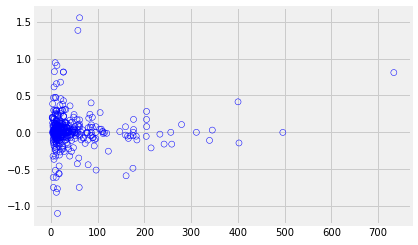

In [155]:
#scatter
plt.scatter(  y=finalframe.runninghighmonthreturns, x=finalframe.caps/1000000000, #market cap in billions
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )
# xlabel('Tobacco')
# ylabel('Alcohol')
# savefig('alcohol_v_tobacco.png', fmt='png', dpi=100)

ValueError: max must be larger than min in range parameter.

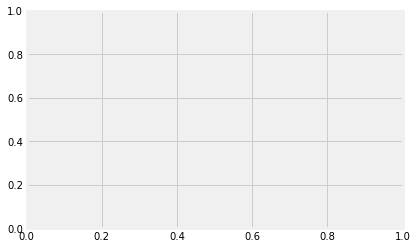

In [140]:
plt.hist(finalframe.logcaps)

(array([   1.,    0.,    0.,    0.,    0.,    0.,    1.,    3.,    0.,
           0.,    0.,    3.,    2.,    3.,    2.,    1.,    2.,    4.,
           4.,    7.,    8.,   12.,   22.,   49.,  106.,   75.,   48.,
          26.,   14.,   13.,    8.,   11.,    1.,    4.,    2.,    4.,
           0.,    0.,    1.,    1.,    1.,    0.,    0.,    4.,    0.,
           1.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    1.,    0.,    0.,    1.]),
 array([-1.09934468, -1.055139  , -1.01093333, -0.96672766, -0.92252198,
        -0.87831631, -0.83411063, -0.78990496, -0.74569929, -0.70149361,
        -0.65728794, -0.61308226, -0.56887659, -0.52467091, -0.48046524,
        -0.43625957, -0.39205389, -0.34784822, -0.30364254, -0.25943687,
        -0.21523119, -0.17102552, -0.12681985, -0.08261417, -0.0384085 ,
         0.00579718,  0.05000285,  0.09420853,  0.1384142 ,  0.18261987,
         0.22682555,  0.27103122,  0.3152369 ,  0.35944257,  0.40364824,
         0.

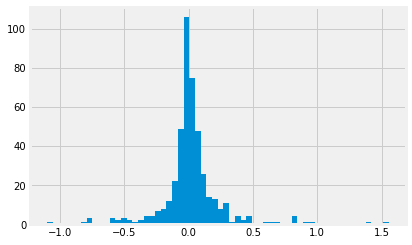

In [141]:
plt.hist(finalframe.runninghighmonthreturns, bins=60)

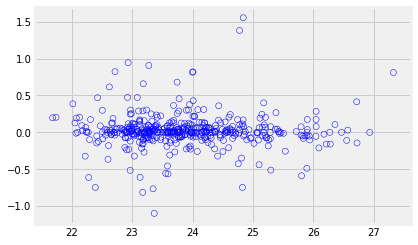

In [142]:
#Log scatter
plt.scatter(  x=finalframe.logcaps, y=finalframe.runninghighmonthreturns,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

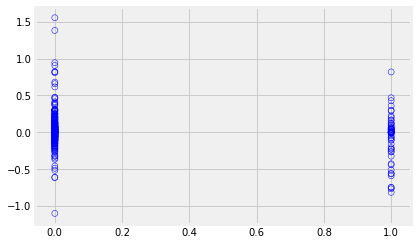

In [143]:
#Financials scatter
plt.scatter(  x=finalframe.Financials, y=finalframe.runninghighmonthreturns,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

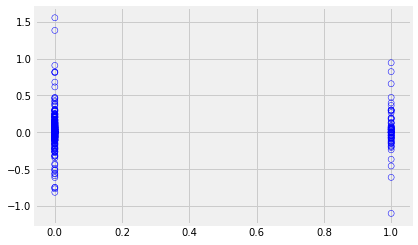

In [144]:
#Consumer Discretionary scatter
plt.scatter(  x=finalframe['Consumer Discretionary'], y=finalframe.runninghighmonthreturns,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

In [ ]:
#Industrials scatter
plt.scatter(  x=finalframe.Industrials, y=finalframe.runninghighmonthreturns,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

In [ ]:
#IT scatter
plt.scatter(  x=finalframe['Information Technology'], y=finalframe.runninghighmonthreturns,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

In [ ]:
#Health Care scatter
plt.scatter(  x=finalframe['Health Care'], y=finalframe.runninghighmonthreturns,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=.5 )

In [ ]:
#Energy scatter
plt.scatter(  x=finalframe['Energy'], y=finalframe.runninghighmonthreturns,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

In [ ]:
#Consumer Staples scatter
plt.scatter(  x=finalframe['Consumer Staples'], y=finalframe.runninghighmonthreturns,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

In [ ]:
#Utilities scatter
plt.scatter(  x=finalframe['Utilities'], y=finalframe.runninghighmonthreturns,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

In [ ]:
#Materials scatter
plt.scatter(  x=finalframe['Materials'], y=finalframe.runninghighmonthreturns,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

In [ ]:
#Telecom scatter
plt.scatter(  x=finalframe['Telecommunications Services'], y=finalframe.runninghighmonthreturns,
         marker='s',
         edgecolor='g',
         facecolor='none',
         alpha=1 )

In [ ]:
fncl = finalframe[finalframe.Financials != 0]
fncl=fncl.iloc[:,0:3]
cdsc = finalframe[finalframe['Consumer Discretionary'] != 0]
cdsc=cdsc.iloc[:,0:3]
idu = finalframe[finalframe.Industrials != 0]
idu=idu.iloc[:,0:3]
it = finalframe[finalframe['Information Technology'] != 0]
it=it.iloc[:,0:3]
hlc = finalframe[finalframe['Health Care'] != 0]
hlc=hlc.iloc[:,0:3]
nrg = finalframe[finalframe.Energy != 0]
nrg=nrg.iloc[:,0:3]
csta = finalframe[finalframe['Consumer Staples'] != 0]
csta=csta.iloc[:,0:3]
uty = finalframe[finalframe['Utilities'] != 0]
uty=uty.iloc[:,0:3]
mat = finalframe[finalframe.Materials != 0]
mat=mat.iloc[:,0:3]
tele = finalframe[finalframe['Telecommunications Services'] != 0]
tele=tele.iloc[:,0:3]

# Scatter within industries

In [ ]:
fncl.corr()

In [ ]:
#scatter financials
plt.scatter(  x=fncl.caps, y=fncl.runninghighmonthreturns,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

In [ ]:
#scatter
plt.scatter(  x=fncl.logcaps, y=fncl.runninghighmonthreturns,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

In [ ]:
cdsc.corr()

In [ ]:
#scatter consumer discretionary
plt.scatter(  x=cdsc.caps, y=cdsc.runninghighmonthreturns,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

In [ ]:
#scatter
plt.scatter(  x=cdsc.logcaps, y=cdsc.runninghighmonthreturns,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

In [ ]:
idu.corr()

In [ ]:
#scatter industrials
plt.scatter(  x=idu.caps, y=idu.runninghighmonthreturns,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

In [ ]:
#scatter
plt.scatter(  x=idu.logcaps, y=idu.runninghighmonthreturns,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

In [ ]:
it.corr() 

In [ ]:
#scatter information technology
plt.scatter(  x=it.caps, y=it.runninghighmonthreturns,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

In [ ]:
#scatter
plt.scatter(  x=it.logcaps, y=it.runninghighmonthreturns,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

In [ ]:
hlc.corr()

In [ ]:
#scatter health care
plt.scatter(  x=hlc.caps, y=hlc.runninghighmonthreturns,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

In [ ]:
#scatter
plt.scatter(  x=hlc.logcaps, y=hlc.runninghighmonthreturns,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

In [ ]:
nrg.corr()

In [ ]:
#scatter energy
plt.scatter(  x=nrg.caps, y=nrg.runninghighmonthreturns,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

In [ ]:
#scatter
plt.scatter(  x=nrg.logcaps, y=nrg.runninghighmonthreturns,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

In [ ]:
#scatter
plt.scatter(  x=csta.caps, y=csta.runninghighmonthreturns,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

In [ ]:
csta.corr()

In [ ]:
#scatter consumer staples
plt.scatter(  x=csta.logcaps, y=csta.runninghighmonthreturns,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

In [ ]:
uty.corr()

In [ ]:
#scatter utilities
plt.scatter(  x=uty.caps, y=uty.runninghighmonthreturns,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

In [ ]:
#scatter
plt.scatter(  x=uty.logcaps, y=uty.runninghighmonthreturns,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

In [ ]:
mat.corr()

In [ ]:
#scatter
plt.scatter(  x=mat.caps, y=mat.runninghighmonthreturns,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

In [ ]:
#scatter
plt.scatter(  x=mat.logcaps, y=mat.runninghighmonthreturns,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

In [ ]:
tele.corr()

In [ ]:
#scatter telecommunications services
plt.scatter(  x=tele.caps, y=tele.runninghighmonthreturns,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

In [ ]:
#scatter telecommunications services
plt.scatter(  x=tele.logcaps, y=tele.runninghighmonthreturns,
         marker='o',
         edgecolor='b',
         facecolor='none',
         alpha=1 )

In [ ]:
finalframe.to_csv('correlationframe.csv')

In [ ]:
# finalframe['caps']=capsreal

In [ ]:
# finalframe.corr()

In [ ]:
ratio.describe()

In [ ]:
trendsclone=pd.read_csv('sp2.csv')

In [ ]:
trendsclone=trendsclone.set_index('Month')

In [ ]:
# trendsmax=trendsclone==100

In [ ]:
# trendsmax

In [ ]:
# maxes2=trendsmax.multiply(binCombine)

In [ ]:
# maxes2

In [ ]:
maxes2.sum().mean()

In [ ]:
stuff=(list(maxes2.describe().values[1]))

In [ ]:
stuff2=[]
for x in range(len(stuff)):
    if str(stuff[x])!='nan':
        stuff2.append(stuff[x])

In [ ]:
sum(stuff2)

In [ ]:
bincombine

In [ ]:
new_data['Market Cap']

In [ ]:
new_data['Sector'].value_counts()

In [ ]:
qualdf=new_data

In [ ]:
qualdf['Financials']=qualdf['Sector']=='Financials'
qualdf['Consumer Discretionary']=qualdf['Sector']=='Consumer Discretionary'
qualdf['Industrials']=qualdf['Sector']=='Industrials'
qualdf['Information Technology']=qualdf['Sector']=='Information Technology'
qualdf['Health Care']=qualdf['Sector']=='Health Care'
qualdf['Energy']=qualdf['Sector']=='Energy'
qualdf['Consumer Staples']=qualdf['Sector']=='Consumer Staples'
qualdf['Utilities']=qualdf['Sector']=='Utilities'
qualdf['Materials']=qualdf['Sector']=='Materials'
qualdf['Telecommunications Services']=qualdf['Sector']=='Telecommunications Services'

In [ ]:
qualdf